In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from cv2 import cv2
from matplotlib import pyplot as plt
from numpy import random

# print("Reading Dataframe")
# info = pd.read_csv("data/dataset_raw/MIAS/Info.txt", sep=" ")
# info = info.drop('Unnamed: 7', axis=1)
# info.head()

In [2]:
label = []
path_base = "E:\\U\\Improvement-Mammograms-to-Breast-Cancer-Detection\\data\\"
type_data = "dataset_roi/"
dataset = "MINI-DDSM/"
folder_find_images = "ClassBMN/"
path_to_read = path_base+type_data +dataset +folder_find_images
import os
folder_of_clases = os.listdir(path_to_read)

# print(folder_of_clases)
# store Labels
for folder in folder_of_clases:
    amount_imgs = len(os.listdir(path_to_read+folder+"/"))
    temp_list = []
    if folder == "benigno":
         temp_list = [0] * amount_imgs
        #         label.append(0)
    elif folder == "maligno":
        temp_list = [1] * amount_imgs
#         label.append(1)
    else: # normal
        temp_list = [2] * amount_imgs
    label += temp_list

#         label.append(2)
label = np.array(label)
unique, counts = np.unique(label, return_counts=True)
print(np.asarray((unique, counts)).T)

# print(f"Cantidad de Imagenes: {len(label)}, Normales = {len(label) - np.sum(label)}, No normales= {np.sum(label)}")
# print("Len de Label:", len(label))
# E:\U\Improvement-Mammograms-to-Breast-Cancer-Detection\data\dataset_preprocessing\MIAS

[[   0 2663]
 [   1 2690]
 [   2 2349]]


In [3]:
import numpy as np
indx_b = np.where(label == 0)[0][0] 
indx_m = np.where(label == 1)[0][0] 
indx_n = np.where(label == 2)[0][0] 

# print(np.where(label == 0)[0])
# print(np.where(label == 1)[])
# print(np.where(label == 2))
# https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# https://stackoverflow.com/questions/10741346/frequency-counts-for-unique-values-in-a-numpy-array
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding
import tensorflow as tf
layer = tf.keras.layers.CategoryEncoding( num_tokens=3, output_mode="one_hot")
new_label = layer(label)
print(new_label[:5])
print(new_label[indx_b])
print(new_label[indx_m])
print(new_label[indx_n])

tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]], shape=(5, 3), dtype=float32)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)


In [4]:
def paths_names_files():
    folder_of_clases = os.listdir(path_to_read)
    folder_name_file_b = []
    folder_name_file_m = []
    folder_name_file_n = []
    #     print("Carpetas:",folder_of_clases)
    # store Labels
    for folder in folder_of_clases:
#         print(folder)
        imgs = os.listdir(path_to_read + folder + "/")
        #         print("Lens ",len(imgs))
        if folder == "benigno":
            folder_name_file_b = list(map(lambda i: folder + "/" + i, imgs))
        elif folder == "maligno":
            folder_name_file_m = list(map(lambda i: folder + "/" + i, imgs))
        else:
            folder_name_file_n = list(map(lambda i: folder + "/" + i, imgs))
    #     print(len(folder_name_file_b))
    #     print(len(folder_name_file_m))
    #     print(len(folder_name_file_n))
    return folder_name_file_b, folder_name_file_m, folder_name_file_n


# paths_names_files()

In [5]:
folder_name_file_b, folder_name_file_m, folder_name_file_n = paths_names_files()
img_name = folder_name_file_b + folder_name_file_m + folder_name_file_n
img_name = np.array(img_name)
print(len(img_name))

7702


In [6]:
print("Len Label:", len(new_label))
print("Shape de img_name", img_name.shape)

Len Label: 7702
Shape de img_name (7702,)


(224, 224, 3)
2931
(224, 224, 3)
6044
(224, 224, 3)
3950
(224, 224, 3)
5007
(224, 224, 3)
4548
(224, 224, 3)
1825
(224, 224, 3)
5984
(224, 224, 3)
2755
(224, 224, 3)
6171
(224, 224, 3)
7422


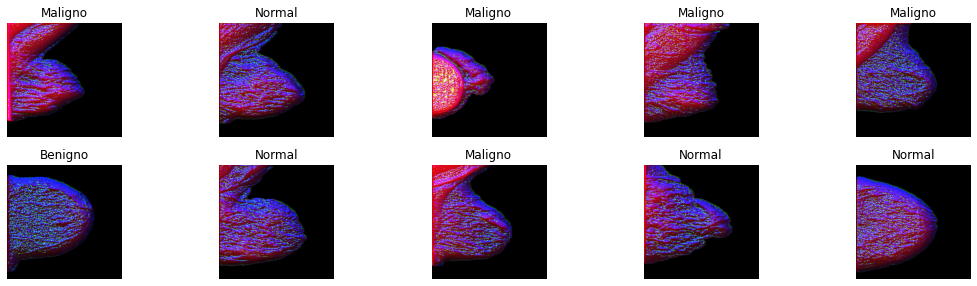

In [7]:
# view image random images
from cv2 import cv2
from matplotlib import pyplot as plt
from numpy import random
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(10):
        rand = random.randint(0,len(new_label))
        ax = plt.subplot(5, 5, i+1)
    
#         print(path_to_read+img_name[rand])
#         break
        # ----------------------------Escala a grises----------------------------         
#         img = cv2.imread(path_to_read+img_name[rand], cv2.IMREAD_GRAYSCALE)
        # ----------------------------Imagen tif----------------------------
        img = cv2.imread(path_to_read+img_name[rand])
        print(img.shape)
        print(rand)
        img = cv2.resize(img, (224,224))
        if list(new_label[rand]) == [1. ,0., 0.]:
            plt.title('Benigno')
        elif list(new_label[rand]) == [0. ,1., 0.]:
            plt.title('Maligno')
        else:
            plt.title('Normal')
        plt.tight_layout()
        plt.axis('off')
#         plt.imshow(img,cmap="gray")
        plt.imshow(img)
#     fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [8]:
import numpy as np
# amount_angles_per_image = 25
# angles = list(np.random.choice(np.arange(0,180), amount_angles_per_image, replace=False))
angles = list(range(0,15))

In [9]:
# Aumentación de datos
img_path = []
last_label = []
IMG_SIZE = 128
# Generar numeros randoms sin repetición
#https://stackoverflow.com/questions/53105185/creating-a-list-of-random-numbers-without-duplicates-in-python     

    
for name_img, label_img in zip(img_name, new_label):
    # ----------------------------Escala a grises----------------------------
#     img = cv2.imread(path_to_read + name_img, cv2.IMREAD_GRAYSCALE)
    # ----------------------------Imagen tif----------------------------
    img = cv2.imread(path_to_read + name_img)

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#     plt.imshow(img)
#     print(img.shape)
#     break
#     print(img)
#     print(img.shape)
#     break
# --------------grayscale---------
#     rows, cols= img.shape
# ----------RGB---------
    rows, cols, c = img.shape
#     print(img.shape)
    
    for angle in angles:
#         angle = 
        M = cv2.getRotationMatrix2D(
            (cols / 2, rows / 2), angle * 2, 1
        )  
        img_rotated = cv2.warpAffine(img, M, (IMG_SIZE, IMG_SIZE))
        img_path.append(img_rotated)
        last_label.append(label_img)


print("Cantidad de labels", len(last_label))
print("Cantidad de img path", len(img_path))
img_path = np.array(img_path)
last_label = np.array(last_label)
print("Shape:", img_path.shape)
# ------------RGB------------
img_path = img_path.reshape((-1, IMG_SIZE, IMG_SIZE, 3))
# ---------------Gray------------------------------
# img_path = img_path.reshape((-1, IMG_SIZE, IMG_SIZE, 1))
print("Nuevo Shape:", img_path.shape)

Cantidad de labels 115530
Cantidad de img path 115530
Shape: (115530, 128, 128, 3)
Nuevo Shape: (115530, 128, 128, 3)


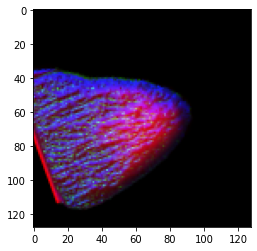

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Comprombar que los 3 canales este rotantdo
plt.imshow(img_path[25])
# plt.imshow(img_path[25],cmap="gray")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)
print(len(x_train),len(x_test),len(y_train),len(y_test))

92424 23106 92424 23106


In [12]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.activations import *
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from time import time
import tensorflow as tf

reg = tf.keras.regularizers.L2(l2=1e-5)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)


model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3)))
# input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(64,
                kernel_initializer = ini,
                activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3)

from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
list_metric = [Precision(name="precision"), Recall(name="recall"),CategoricalAccuracy()]

model.compile(optimizer=optimizer,
              loss= 'categorical_crossentropy',
              metrics=list_metric)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 30, 30, 64)        4

In [13]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=3, restore_best_weights=True, verbose=1
)

# early_stop = EarlyStopping(monitor='val_categorical_accuracy', mode='min', patience=3,restore_best_weights=True, verbose=1)

check_point_filepath = "temp/"

model_check_point = ModelCheckpoint(
    filepath=check_point_filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)
# model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

In [14]:
train = True
if train:
    epochs=100
    history = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=epochs,
                 batch_size=128,
                 callbacks=[early_stop, model_check_point])
else:
    model = tf.keras.models.load_model('temp/')

Epoch 1/100
578/578 [==============================] - 85s 92ms/step - loss: 0.9147 - precision: 0.6237 - recall: 0.3301 - categorical_accuracy: 0.5328 - val_loss: 0.8631 - val_precision: 0.6497 - val_recall: 0.3674 - val_categorical_accuracy: 0.5529

Epoch 00001: val_loss improved from inf to 0.86313, saving model to temp\
INFO:tensorflow:Assets written to: temp\assets
Epoch 2/100
578/578 [==============================] - 51s 88ms/step - loss: 0.8389 - precision: 0.6601 - recall: 0.4502 - categorical_accuracy: 0.5866 - val_loss: 0.7949 - val_precision: 0.6772 - val_recall: 0.4907 - val_categorical_accuracy: 0.6132

Epoch 00002: val_loss improved from 0.86313 to 0.79486, saving model to temp\
INFO:tensorflow:Assets written to: temp\assets
Epoch 3/100
578/578 [==============================] - 51s 88ms/step - loss: 0.7731 - precision: 0.6887 - recall: 0.5352 - categorical_accuracy: 0.6333 - val_loss: 0.7550 - val_precision: 0.6979 - val_recall: 0.5413 - val_categorical_accuracy: 0.6384

578/578 [==============================] - 50s 87ms/step - loss: 0.3072 - precision: 0.8843 - recall: 0.8696 - categorical_accuracy: 0.8772 - val_loss: 0.3763 - val_precision: 0.8609 - val_recall: 0.8360 - val_categorical_accuracy: 0.8502

Epoch 00024: val_loss improved from 0.39871 to 0.37630, saving model to temp\
INFO:tensorflow:Assets written to: temp\assets
Epoch 25/100
578/578 [==============================] - 50s 87ms/step - loss: 0.3041 - precision: 0.8858 - recall: 0.8714 - categorical_accuracy: 0.8788 - val_loss: 0.3708 - val_precision: 0.8649 - val_recall: 0.8393 - val_categorical_accuracy: 0.8529

Epoch 00025: val_loss improved from 0.37630 to 0.37078, saving model to temp\
INFO:tensorflow:Assets written to: temp\assets
Epoch 26/100
578/578 [==============================] - 50s 87ms/step - loss: 0.2981 - precision: 0.8890 - recall: 0.8751 - categorical_accuracy: 0.8824 - val_loss: 0.3768 - val_precision: 0.8625 - val_recall: 0.8406 - val_categorical_accuracy: 0.8520

Epoc

In [15]:
from src.utils.utils import Save_model_summary_txt_architecture_json

Save_model_summary_txt_architecture_json(model)

Summary en txt creado
Arquitectura en json creado


In [17]:
if True:
    tf.keras.models.save_model(model, "temp/model/")

INFO:tensorflow:Assets written to: temp/model/assets


In [18]:

import mlflow
from mlflow.entities import Metric
from mlflow.tracking import MlflowClient
from src.parameters.model_parameters import *
from src.utils.utils import *
mlflow_client = MlflowClient()
EXPERIMENT_NAME = "Mini_DDSM_ClasBMN"
try:
    EXPERIMENT_ID = mlflow.create_experiment(EXPERIMENT_NAME)
except:
    EXPERIMENT_ID = mlflow_client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
name_red = "new_CNN_3_canales"
transfer_learning = False
batch_size=128
learning_rate = 1e-3
loss = "Adam"
dataset = "MiniDDSM"
mode_classification = "ClassBMN"
validation_split = "0.2"
type_dataset_train = "Brint"
with mlflow.start_run(experiment_id=EXPERIMENT_ID, run_name=name_red) as active_run:
    # with mlflow.start_run(run_name=name_red) as active_run:
    # mlflow_client = MlflowClient()
    # experiment_id = mlflow_client.create_experiment("Mamografías CNNs experimentos")
    # experiment_id = "0"
    # run = mlflow_client.create_run(experiment_id)
    all_metrics = []
    f1, val_f1 = get_F1_scores(history)
    for metric_name in history.history:
        for i in history.epoch:
            metric = Metric(
                key=metric_name,
                value=history.history[metric_name][i],
                timestamp=0,
                step=i,
            )
            all_metrics.append(metric)
    all_metrics = all_metrics + f1 + val_f1

    mlflow_client.log_batch(run_id=active_run.info.run_id, metrics=all_metrics)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="batch size", value=batch_size)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="learning rate", value=learning_rate)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="epochs", value=epochs)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="optimizer", value=optimizer.__class__.__name__)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Loss", value=loss)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="DB", value=dataset)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Type data", value=type_dataset_train)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Transfer Learning", value=transfer_learning)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="ModoClass", value=mode_classification)
    mlflow_client.log_param(run_id=active_run.info.run_id, key="Split test", value=validation_split)
    mlflow.log_artifact("temp/", artifact_path="arquitectura")
    # if config.LOG_JSON_TXT_MODEL_MLFlow:
    #     mlflow.log_artifact("temp/summary_model.txt", artifact_path="arquitectura")
    #     mlflow.log_artifact("temp/architecture.json", artifact_path="arquitectura")
    # if config.LOG_MODEL_MLFlow:
    #     mlflow_client.log_artifacts(run_id=active_run.info.run_id, local_dir="temp/model/")

    mlflow_client.log_batch(run_id=active_run.info.run_id, metrics=all_metrics)
    print("Todas las metricas guardadas")

Todas las metricas guardadas


In [25]:
result

array([[0.27878463, 0.07774101, 0.64347434]], dtype=float32)

The results was: False       And the probability being: 0.2787846326828003
Real value was: [ True False False]
Test id: 666


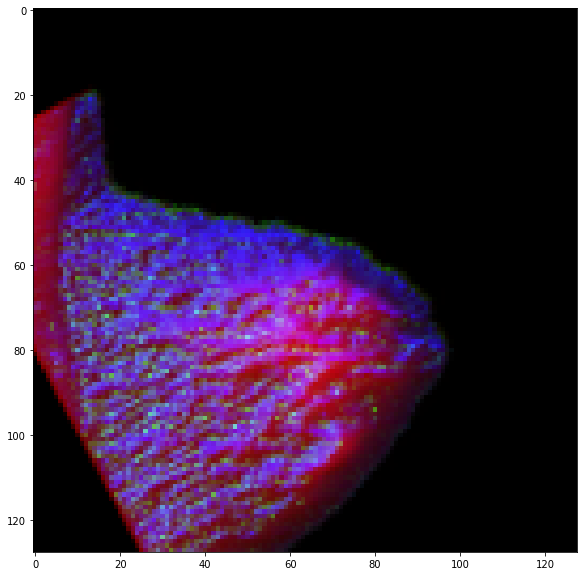

In [20]:
from random import randint
test_num = randint(0,len(x_test))
#test_num = 274
result = model.predict(np.array([x_test[test_num]]))

plt.figure(figsize= (10,10))
plt.imshow(x_test[test_num])

# print(f"The results was: {result[0][0]>= 0.5}       And the probability being: {result[0][0]}\nReal value was: {y_test[test_num]>=0.5}")
# print(f"Test id: {test_num}")

In [30]:
!pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


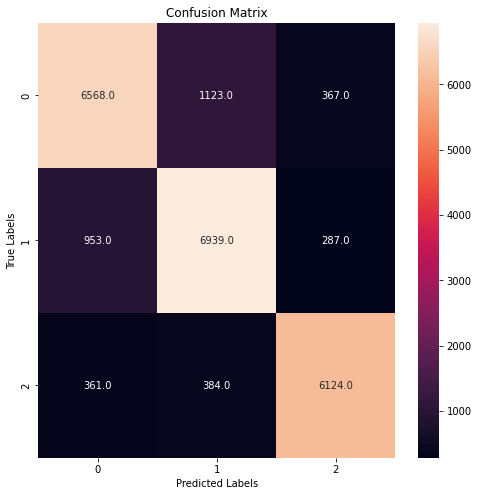

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicting labels from X_test data
y_pred = model.predict(x_test)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)
# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                        para_precision= None,
                        para_recall =  None,
                        para_f1_score = None
                         ):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
#             para_precision para_recall,para_f1_score
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,para_precision,para_recall,para_f1_score)
            
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
#     fig = heatmap.get_figure()
#     fig.savefig("heatmap.png") 
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [23]:
# print(model.evaluate(x_test,  y_test, verbose=2))

test_loss,test_precsision, test_recall,test_acc,  = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\ntest_precsision :',test_precsision )
print('\ntest_recall :',test_recall )
print('\nTtest_acc :', test_acc)

723/723 - 7s - loss: 0.3831 - precision: 0.8598 - recall: 0.8381 - categorical_accuracy: 0.8496

Test loss: 0.3831046223640442

test_precsision : 0.8598197102546692

test_recall : 0.8380507230758667

Ttest_acc : 0.8496061563491821


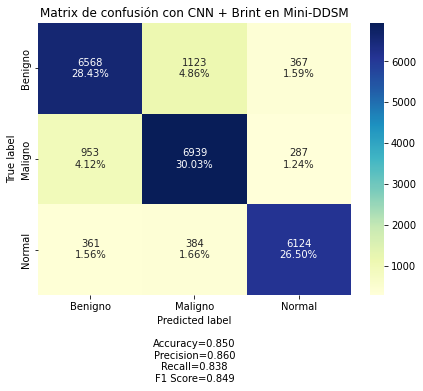

In [52]:
categories = ["Benigno", "Maligno", "Normal"]
test_f1_score = (2 * test_precsision * test_recall) / (test_precsision + test_recall)
make_confusion_matrix(
    confmx,
    figsize=(7, 5),
    categories=categories,
    title="Matrix de confusión con CNN + Brint en Mini-DDSM",
    para_precision=test_precsision,
    para_recall=test_recall,
    para_f1_score=test_f1_score,
    cmap='YlGnBu'
)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      8058
           1       0.82      0.85      0.83      8179
           2       0.90      0.89      0.90      6869

    accuracy                           0.85     23106
   macro avg       0.85      0.85      0.85     23106
weighted avg       0.85      0.85      0.85     23106



In [21]:
x_test.shape

(23106, 128, 128, 3)

In [22]:
y_test.shape

(23106, 3)